In [ ]:
#Pengambilan data
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip

--2020-06-03 11:08:15--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.91MB/s    in 37s     

2020-06-03 11:08:53 (8.37 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile as z
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras import layers
#Unzip
zip = '/tmp/rockpaperscissors.zip'
zip_ref = z.ZipFile(zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
os.remove('/tmp/rockpaperscissors/rps-cv-images/README_rpc-cv-images.txt')

Using TensorFlow backend.


In [ ]:
#Dataset+Augmentasi
traingen = image.ImageDataGenerator(
                    rescale=1/255,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    rotation_range=20,
                    shear_range=0.2,
                    zoom_range=0.2,
                    validation_split=0.2,
                    horizontal_flip=True,
                    vertical_flip=True,
)
valgen = image.ImageDataGenerator(
                    rescale=1/255,
                    validation_split=0.2,
)
train = traingen.flow_from_directory(
    '/tmp/rockpaperscissors/rps-cv-images',
    batch_size=32,
    target_size=(200, 200),
    color_mode="rgb",
    classes=['paper','rock','scissors'],
    class_mode="sparse",
    shuffle=True,
    seed=123,
    subset="training",
    interpolation="nearest",
)
val = valgen.flow_from_directory(
    '/tmp/rockpaperscissors/rps-cv-images',
    batch_size=32,
    target_size=(200, 200),
    color_mode="rgb",
    classes=['paper','rock','scissors'],
    class_mode="sparse",
    shuffle=True,
    seed=123,
    subset="validation",
    interpolation="nearest",
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [ ]:
#Model
init = keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=123)
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), kernel_initializer=init, padding="same", activation="relu",input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(32, (3, 3), kernel_initializer=init, padding="same", activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), kernel_initializer=init, padding="same", activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), kernel_initializer=init, padding="same", activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), kernel_initializer=init, padding="same", activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, (3, 3), kernel_initializer=init, padding="same", activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, (3, 3), kernel_initializer=init, padding="same", activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.summary()
model.add(layers.Dense(128, kernel_initializer=init, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(3, kernel_initializer=init, activation="softmax"))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        3

In [ ]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
          optimizer=keras.optimizers.Adam(learning_rate=0.0001),
          metrics=['accuracy']
)
#Training
history = model.fit(train, epochs=10, 
                  batch_size=32,
                  validation_data=val, 
                  steps_per_epoch=int(1750/32),
                  callbacks = keras.callbacks.EarlyStopping(
                              monitor='accuracy', 
                              patience=2,
                              restore_best_weights=True)
)

Epoch 1/10
54/54 [==============================] - 110s 2s/step - loss: 1.0966 - accuracy: 0.3682 - val_loss: 1.0888 - val_accuracy: 0.3432
Epoch 2/10
54/54 [==============================] - 112s 2s/step - loss: 1.0628 - accuracy: 0.4433 - val_loss: 0.9786 - val_accuracy: 0.6362
Epoch 3/10
54/54 [==============================] - 110s 2s/step - loss: 0.9070 - accuracy: 0.6265 - val_loss: 0.5243 - val_accuracy: 0.9062
Epoch 4/10
54/54 [==============================] - 110s 2s/step - loss: 0.5776 - accuracy: 0.7755 - val_loss: 0.3256 - val_accuracy: 0.9108
Epoch 5/10
54/54 [==============================] - 110s 2s/step - loss: 0.4244 - accuracy: 0.8394 - val_loss: 0.2169 - val_accuracy: 0.9451
Epoch 6/10
54/54 [==============================] - 110s 2s/step - loss: 0.3164 - accuracy: 0.8906 - val_loss: 0.1456 - val_accuracy: 0.9497
Epoch 7/10
54/54 [==============================] - 112s 2s/step - loss: 0.3174 - accuracy: 0.8877 - val_loss: 0.1287 - val_accuracy: 0.9497
Epoch 8/10
54

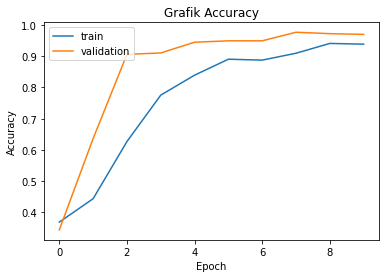

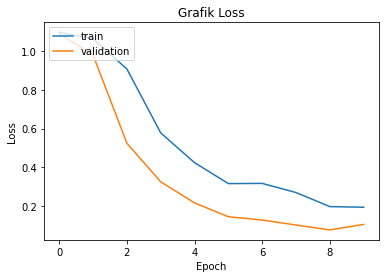

In [ ]:
#Grafik
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Grafik Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Grafik Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Saving 82wZr9Bpl9vfsoG1.png to 82wZr9Bpl9vfsoG1.png
Rock


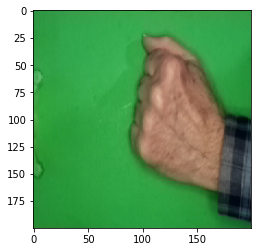

In [ ]:
#Upload
upload = files.upload()
#Predict
for i in upload.keys():
  nama = i
  img = image.load_img(nama, target_size=(200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)	  
  images = np.vstack([x])
  kelas = model.predict(images, batch_size=32)

if kelas[0, 0] == 1:
  print('Paper')
elif kelas[0, 1] == 1:
  print('Rock')
else:
  print('Scissors')